In [113]:
grid = [(i, j) for j in range(101) for i in range(101)]


In [1]:
import random 
new_grid=[]
while(len(new_grid)<50):
    a = random.choice(grid)
    if a not in new_grid:
         new_grid.append(a)
print (new_grid)

NameError: name 'grid' is not defined

In [ ]:
coordinates = [(75, 4), (51, 68), (2, 87), (52, 6), (8, 94), (41, 68), (41, 42), (100, 0), (69, 43), (99, 48), (52, 95), (81, 98), (90, 33), (95, 8), (55, 5), (40, 71), (10, 45), (8, 55), (58, 34), (14, 85), (22, 61), (15, 25), (93, 75), (32, 49), (100, 63), (58, 92), (89, 84), (74, 21), (59, 26), (41, 67), (69, 87), (14, 83), (28, 88), (56, 23), (44, 93), (54, 98), (7, 68), (46, 91), (12, 76), (33, 92), (4, 46), (26, 3), (52, 76), (5, 40), (29, 75), (11, 22), (83, 0), (71, 22), (28, 89), (34, 30)]

In [ ]:
coordinates=new_grid
print (coordinates)


In [ ]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
x=[]
y=[]

for i in range(50):
    z=coordinates[i]
    x.append(z[0])
    y.append(z[1])

plt.scatter(x,y)
plt.show()

In [ ]:
#Making Parents

def gen_parents(seed_n) :
    seed = []
    
    for i in range(50):
         seed.append(i) 
            
    
    parents=[]
    for i in range(seed_n):
        random.shuffle(seed)
        if seed not in parents:
            parents.append(seed[::])
    
    return parents 

In [2]:
#fitness function
#Here, Fitness is nothing but the distance between the coordinates
#the numbers in the parents are nothing but the indices pointing to the cities in the coordinates


In [3]:
#making fitness rank function 
#here less rank = more fit

def fitness(chromosome):
    fit=0
    for i in range(49):
        p=chromosome[i]
        q=chromosome[i+1]
        fit += ((x[p]-x[q])**2 + (y[p]-y[q])**2)**(1/(2))
    fit+=((x[q]-x[0])**2 + (y[q]-y[0])**2)**(1/(2))
    return fit

#making manhattan fitness
def mfitness(chromosome):
    fit=0
    for i in range(49):
        p=chromosome[i]
        q=chromosome[i+1]
        fit += (abs(x[p]-x[q]) + abs(y[p]-y[q])) 
    
    return fit


In [4]:
#making crossover function (1 point crossover)
def crossover(chromo1,chromo2):
    p=random.randint(0,49)
    child1=chromo1[:p]
    child2=chromo2[p:]
    for i in range(50):
        if chromo2[i] not in child1 :
            child1.append(chromo2[i])
        if chromo1[i] not in child2 :
            child2.append(chromo1[i])
    return child1,child2

In [5]:
#making mutation
def mutation(chromo1):
    gen_ran_111=list(range(35))
    r_=int(random.choice(gen_ran_111))
    mutated_element = chromo1.pop(r_)
    chromo1.append(mutated_element)
    return chromo1
    


In [6]:
#Reproduction
seed=gen_parents(11)
i_population=seed
no_of_gen= 50
avg_fit=[]
best_fit=[]
print(len(i_population))
for j in range(no_of_gen):
    for i in range(11):
        ran_gen_001=random.randint(0,len(i_population)-1)
        ran_gen_002=random.randint(0,len(i_population)-1)
        kids=crossover(i_population[ran_gen_001],i_population[ran_gen_002])
        i_population.extend(kids)
#     i_population.sort(key = lambda x:fitness(x))
    avfit=sum(list(map(fitness,i_population)))/len(i_population)
    avg_fit.append(avfit)
    

#Elimination
    best_guy=min(i_population, key = lambda x:fitness(x))
#     print(best_guy)
    best_fit.append(fitness(best_guy))
    new_i_population=[best_guy]
#     print(len(new_i_population), new_i_population, end=" ")
    print(len(i_population),end=" ")
    for i in range(len(i_population)):
        val=fitness(i_population[i])
        count=0
        for j in range(i-1,(i+2)%len(i_population) ):
            if val>fitness(i_population[j]): 
                count+=1
        if count>=2: 
            new_i_population.append(i_population[i])
    print(len(new_i_population))
    i_population=new_i_population
#     i_population.sort(key = lambda x:fitness(x))
#     ran_gen_003=random.randint(7,11)
#     i_population=i_population[:len(i_population)-(ran_gen_003)]
# print(len(i_population))

NameError: name 'gen_parents' is not defined

In [250]:
#results of euclidean fitness
print(len(i_population))
print(i_population[0])
print(fitness(i_population[0]),fitness(i_population[-1]))
fc = i_population[0]
print(len(i_population))


9
[23, 38, 2, 1, 15, 4, 20, 26, 30, 10, 43, 40, 36, 11, 28, 33, 6, 21, 5, 25, 22, 34, 32, 16, 31, 48, 8, 18, 46, 41, 37, 39, 7, 49, 27, 44, 19, 3, 24, 12, 29, 17, 42, 9, 14, 13, 45, 35, 47, 0]
2256.8832361699483 3468.631771250814
9


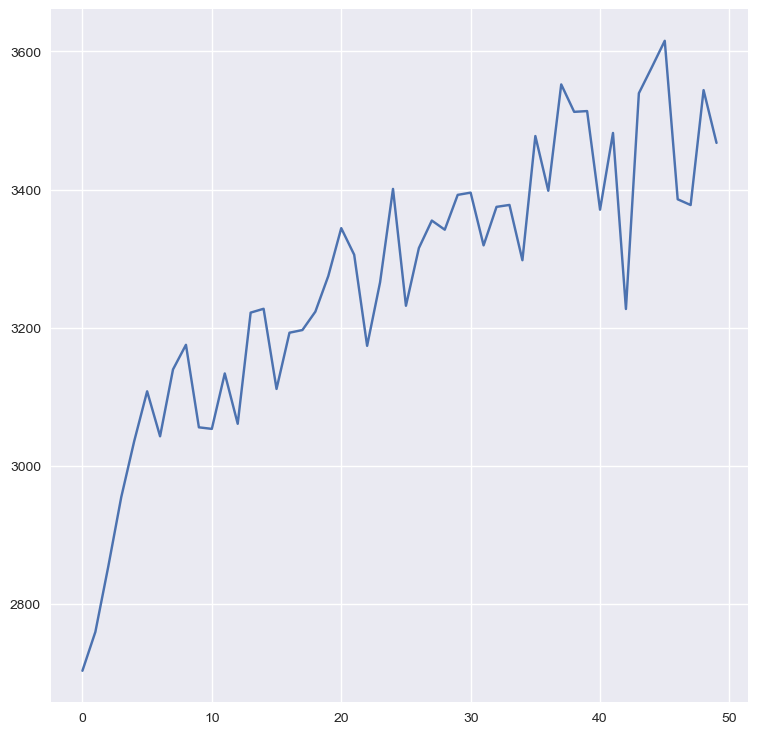

In [251]:
#avg. fitness rank  vs generation
plt.plot(list(range(no_of_gen)),avg_fit)


2256.8832361699483


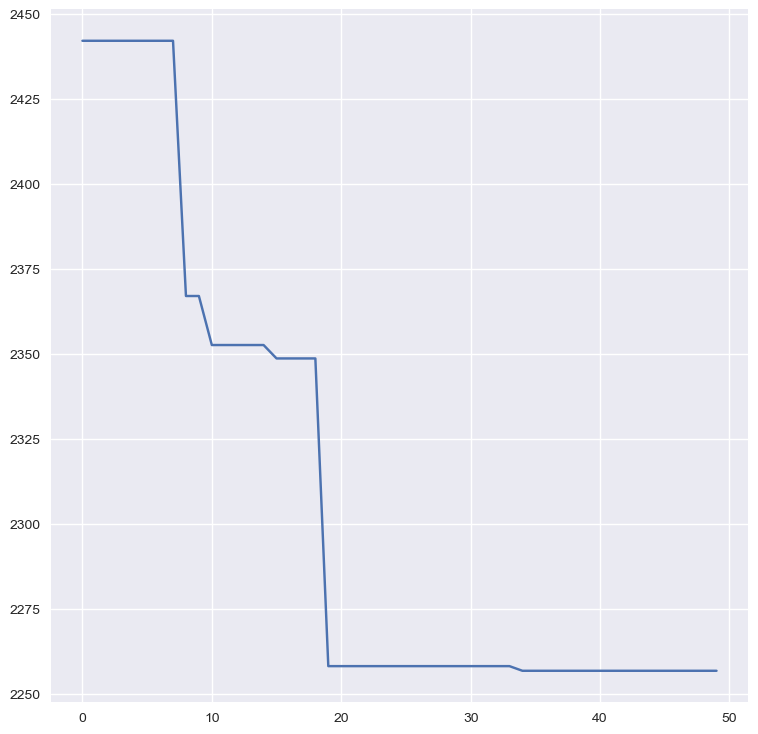

In [252]:
#best fitness rank vs generation
plt.plot(list(range(no_of_gen)),best_fit)
plt.rcParams['figure.figsize'] = [9,9]
print(best_fit[-1])

[23, 38, 2, 1, 15, 4, 20, 26, 30, 10, 43, 40, 36, 11, 28, 33, 6, 21, 5, 25, 22, 34, 32, 16, 31, 48, 8, 18, 46, 41, 37, 39, 7, 49, 27, 44, 19, 3, 24, 12, 29, 17, 42, 9, 14, 13, 45, 35, 47, 0]


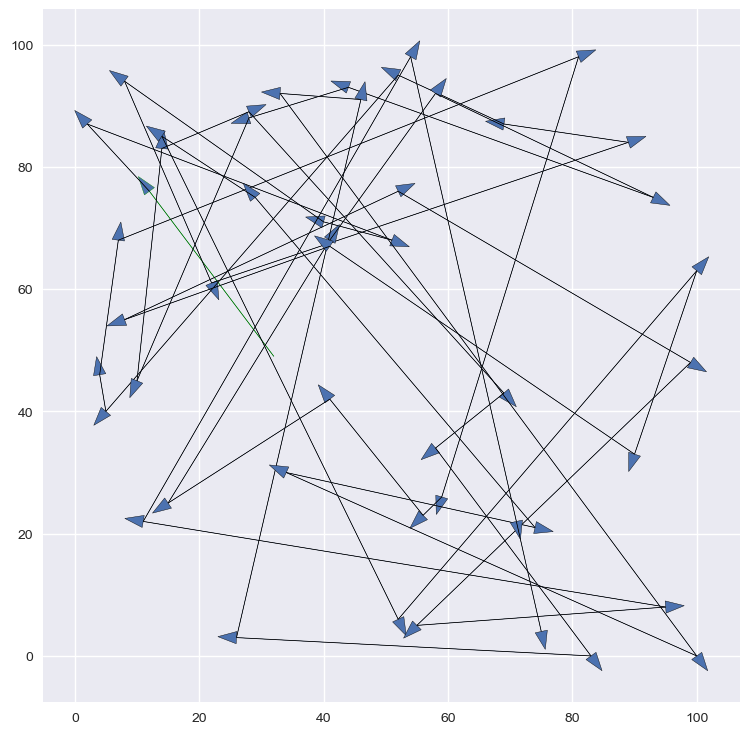

In [253]:
print(fc)
for i in range(49):
    x1 = x[fc[i]]
    y1 = y[fc[i]]
    x2 = x[fc[i+1]]
    y2 = y[fc[i+1]]
    if(i == 0):
        plt.arrow(x1,y1,x2-x1,y2-y1,width=0.05,head_width=2,ec='green')
    else:
        plt.arrow(x1,y1,x2-x1,y2-y1,width=0.05,head_width=2)